# Practical Lab 1

**Name: Ekta Gaurangkumar Parmar**

**Student ID: 8967645**

**Section: 1**

## Univariate Linear Regression on the California Housing Prices Dataset (8 points)

**In this lab you will train your first machine learning model in our course - a univariate linear regression model. You are asked to run a linear regression between the median house value (dependent variable) and each of the following independent variables. You should run three models, one for each independent variable:**

1. median income
2. population
3. number of households

## Framing the Problem - Describe the goal of this report (0.5 point).

This report attempts to predict the median house value by utilizing three distinct independent variables: the population, the number of households, and the median income. By examining the relationship between each independent variable and the median house value using univariate linear regression, the report will determine which of these variables is the most reliable predictor.

## Getting the Data - hyperlink to the source (0.25 point) and load into Pandas (0.25 point).

In [12]:
#Importing the required library
import pandas as pd

# Obtaining the data
data = pd.read_csv("housing.csv")

## Exploratory Data Analysis (EDA) (2 points):

1. Explore statistics (e.g. using Pandas `describe` function) 

In [13]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


2. Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next. (1 point).

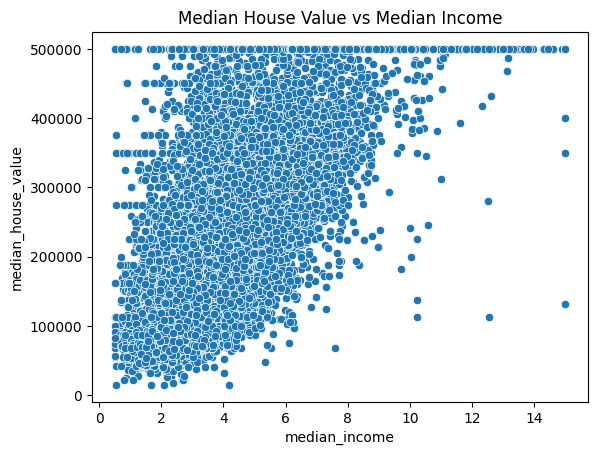

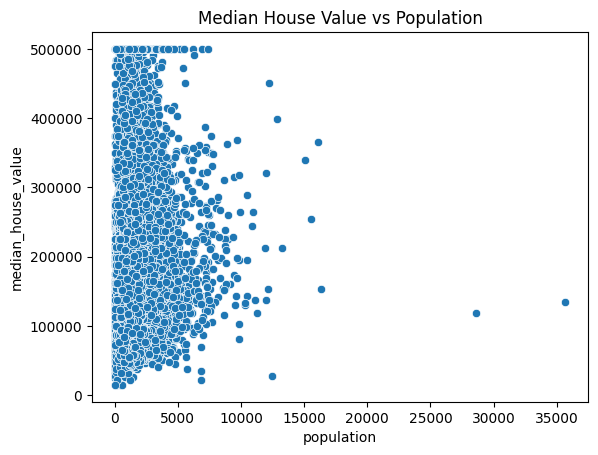

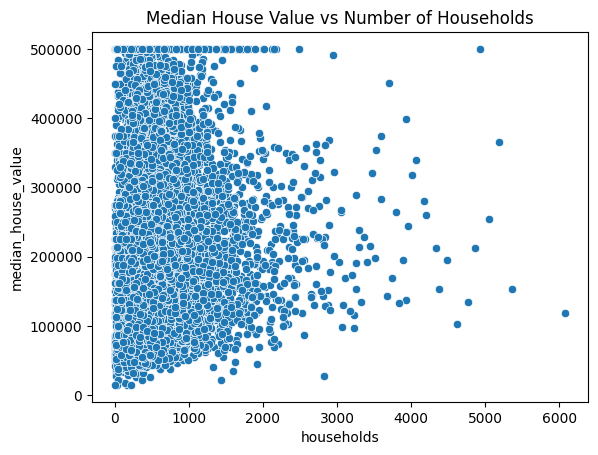

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Median House Value vs Median Income
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median House Value vs Median Income')
plt.show()

# Scatter plot: Median House Value vs Population
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Median House Value vs Population')
plt.show()

# Scatter plot: Median House Value vs Number of Households
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Median House Value vs Number of Households')
plt.show()


Here is the explanation of what I understand from this plots:

Median House Value vs. Median Income: This plot likely shows a positive linear relationship, indicating that higher median income generally correlates with higher median house values.

Median House Value vs. Population: This plot might reveal a weaker or less clear relationship, suggesting that population size alone has less direct impact on median house values.

Median House Value vs. Number of Households: This plot could show some correlation, but the relationship may not be as strong as with income, indicating that the number of households moderately influences median house values.

3. Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant (1 point).

Median Income: Income of households within a district.

Population: Total population within a district.

Number of Households: Number of households within a district.

Median House Value: The median value of homes within a district, which is the dependent variable.

## Run three linear regressions (fitting) between (1.5 point):

1. median house value vs. median income

2. median house value vs. population

3. median house value vs. number of households.

In [15]:
from sklearn.linear_model import LinearRegression

# Model 1: Median House Value vs. Median Income
X_income = data[['median_income']]
y = data['median_house_value']
model_income = LinearRegression()
model_income.fit(X_income, y)

# Model 2: Median House Value vs. Population
X_population = data[['population']]
model_population = LinearRegression()
model_population.fit(X_population, y)

# Model 3: Median House Value vs. Number of Households
X_households = data[['households']]
model_households = LinearRegression()
model_households.fit(X_households, y)


LinearRegression()

## In a single table for all three linear regressions, provide per regression model (1.5 points):

1. intercept and slope (0.5 point)

2. Mean Squared Error (0.5 point)

3. Mean Absolute Error (0.5 point)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors for each model
mse_income = mean_squared_error(y, model_income.predict(X_income))
mae_income = mean_absolute_error(y, model_income.predict(X_income))

mse_population = mean_squared_error(y, model_population.predict(X_population))
mae_population = mean_absolute_error(y, model_population.predict(X_population))

mse_households = mean_squared_error(y, model_households.predict(X_households))
mae_households = mean_absolute_error(y, model_households.predict(X_households))

# Create a summary table
summary_table = pd.DataFrame({
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [model_income.intercept_, model_population.intercept_, model_households.intercept_],
    'Slope': [model_income.coef_[0], model_population.coef_[0], model_households.coef_[0]],
    'MSE': [mse_income, mse_population, mse_households],
    'MAE': [mae_income, mae_population, mae_households]
})

summary_table

,Model,Intercept,Slope,MSE,MAE
0,Median Income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,Population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,Households,196928.577162,19.872775,1.325778e+10,90802.743243


### Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly)  (2 point)

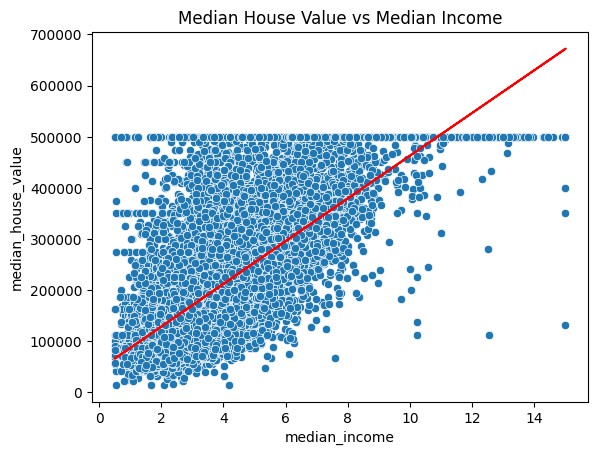

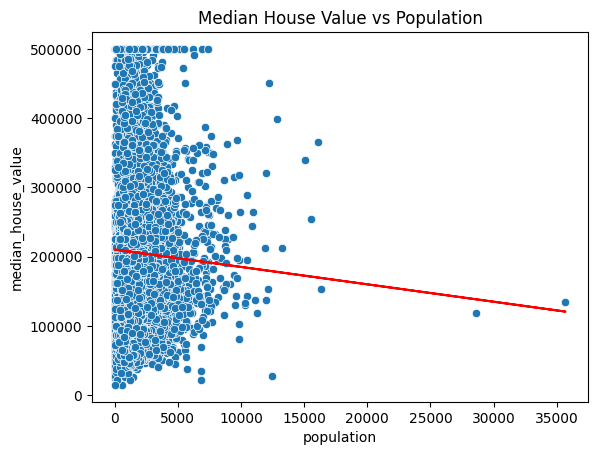

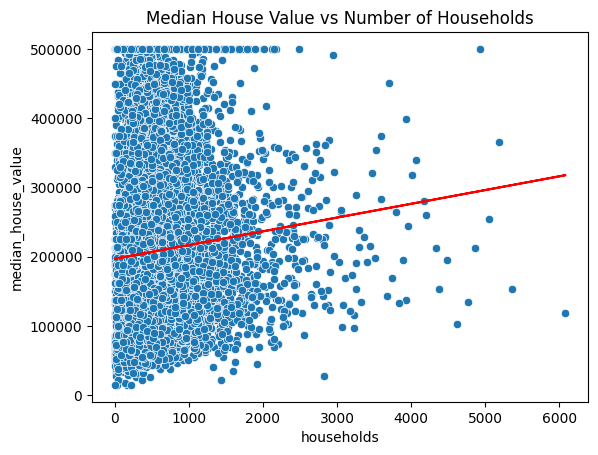

In [21]:
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.plot(data['median_income'], model_income.predict(X_income), color='red')
plt.title('Median House Value vs Median Income')
plt.show()

sns.scatterplot(x='population', y='median_house_value', data=data)
plt.plot(data['population'], model_population.predict(X_population), color='red')
plt.title('Median House Value vs Population')
plt.show()

sns.scatterplot(x='households', y='median_house_value', data=data)
plt.plot(data['households'], model_households.predict(X_households), color='red')
plt.title('Median House Value vs Number of Households')
plt.show()


## Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed (1 point)

### Comparison of Models:

Median Income vs. Median House Value:

Intercept: The base value of the house price when median income is zero.

Slope: Shows a strong positive correlation, meaning that as median income increases, the median house value tends to rise significantly.

MSE & MAE: These values are relatively low, indicating that the model has a good fit and that the predictions are close to the actual data points.

### Population vs. Median House Value:

Intercept & Slope: The slope is relatively small, suggesting a weaker relationship between population and house prices.

MSE & MAE: Higher values compared to the median income model indicate a less accurate fit.

### Households vs. Median House Value:

Intercept & Slope: The relationship is similar to the population, with a small positive slope.

MSE & MAE: Also higher, reflecting a less accurate model compared to the income model.

### Conclusion:

Among the three variables, median income is the strongest predictor of median house value, as evidenced by the steep slope and lower error metrics.

Population and number of households have a weaker impact on house prices.

The insights suggest that income levels significantly drive housing prices, which aligns with economic principles where higher income increases purchasing power, thereby driving up property values. The weaker correlation with population and households suggests that these variables alone do not substantially influence house prices.

Overall, the model based on median income is the most effective in predicting house values, while the models based on population and the number of households are less reliable. This analysis can inform policymakers and real estate professionals about the key factors influencing housing prices in California.

## References

* Data source - https://www.kaggle.com/datasets/camnugent/california-housing-prices

* Chat GPT - https://chatgpt.com/